In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import cycle

pd.set_option('display.max_columns', 50)
plt.style.use('bmh')
color_pal=plt.rcParams['axes.prop_cycle'].by_key()['color']
color_cycle=cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/data/m5-data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/data/m5-data/calendar.csv
/content/drive/MyDrive/data/m5-data/sales_train_evaluation.csv
/content/drive/MyDrive/data/m5-data/sales_train_validation.csv
/content/drive/MyDrive/data/m5-data/sell_prices.csv
/content/drive/MyDrive/data/m5-data/sample_submission.csv
/content/drive/MyDrive/data/m5-data/sales_test_validation.csv
/content/drive/MyDrive/data/m5-data/sales_test_evaluation.csv
/content/drive/MyDrive/data/m5-data/submissions/dlinear-lb-56-ep-100-2.0.csv
/content/drive/MyDrive/data/m5-data/submissions/dlinear-lb-56-ep-150-2.0.csv
/content/drive/MyDrive/data/m5-data/submissions/dlinear-lb-56-ep-200-2.0.csv
/content/drive/MyDrive/data/m5-data/submissions/dlinear-lb-7-ep-100-1.0.csv
/content/drive/MyDrive/data/m5-data/submissions/dlinear-lb-14-ep-100-1.0.csv
/content/drive/MyDrive/data/m5-data/submissions/dlinear-lb-28-ep-100-1.0.csv
/content/drive/MyDrive/data/m5-data/submissions/dlinear-lb-56-ep-100-1.0.csv
/content/drive/MyDrive/data/m5-data/submissions/dline

In [ ]:
INPUT_DIR='/content/drive/MyDrive/data/m5-data/'
cal_data=pd.read_csv(INPUT_DIR+'calendar.csv')
salestv_data=pd.read_csv(INPUT_DIR+'sales_train_validation.csv')
ss_data=pd.read_csv(INPUT_DIR+'sample_submission.csv')
sellp_data=pd.read_csv(INPUT_DIR+'sell_prices.csv')

In [ ]:
ss_data

id  F1  F2  F3  F4  F5  F6  F7  F8  F9  F10  \
0      HOBBIES_1_001_CA_1_validation   0   0   0   0   0   0   0   0   0    0   
1      HOBBIES_1_002_CA_1_validation   0   0   0   0   0   0   0   0   0    0   
2      HOBBIES_1_003_CA_1_validation   0   0   0   0   0   0   0   0   0    0   
3      HOBBIES_1_004_CA_1_validation   0   0   0   0   0   0   0   0   0    0   
4      HOBBIES_1_005_CA_1_validation   0   0   0   0   0   0   0   0   0    0   
...                              ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...   
60975    FOODS_3_823_WI_3_evaluation   0   0   0   0   0   0   0   0   0    0   
60976    FOODS_3_824_WI_3_evaluation   0   0   0   0   0   0   0   0   0    0   
60977    FOODS_3_825_WI_3_evaluation   0   0   0   0   0   0   0   0   0    0   
60978    FOODS_3_826_WI_3_evaluation   0   0   0   0   0   0   0   0   0    0   
60979    FOODS_3_827_WI_3_evaluation   0   0   0   0   0   0   0   0   0    0   

       F11  F12  F13  F14  F15  F16  F17  F18  F19  F20  F21  F22  F23  F24  \
0        0    0    0    0    0    0    0    0    0    0    0    0    0    0   
1        0    0    0    0    0    0    0    0    0    0    0    0    0    0   
2        0    0    0    0    0    0    0    0    0    0    0    0    0    0   
3        0    0    0    0    0    0    0    0    0    0    0    0    0    0   
4        0    0    0    0    0    0    0    0    0    0    0    0    0    0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
60975    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
60976    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
60977    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
60978    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
60979    0    0    0    0    0    0    0    0    0    0    0    0    0    0   

       F25  F26  F27  F28  
0        0    0    0    0  
1        0    0    0    0  
2        0    0    0    0  
3        0    0    0    0  
4        0    0    0    0  
...    ...  ...  ...  ...  
60975    0    0    0    0  
60976    0    0    0    0  
60977    0    0    0    0  
60978    0    0    0    0  
60979    0    0    0    0  

[60980 rows x 29 columns]

In [ ]:
salestv_data

id        item_id    dept_id   cat_id  \
0      HOBBIES_1_001_CA_1_validation  HOBBIES_1_001  HOBBIES_1  HOBBIES   
1      HOBBIES_1_002_CA_1_validation  HOBBIES_1_002  HOBBIES_1  HOBBIES   
2      HOBBIES_1_003_CA_1_validation  HOBBIES_1_003  HOBBIES_1  HOBBIES   
3      HOBBIES_1_004_CA_1_validation  HOBBIES_1_004  HOBBIES_1  HOBBIES   
4      HOBBIES_1_005_CA_1_validation  HOBBIES_1_005  HOBBIES_1  HOBBIES   
...                              ...            ...        ...      ...   
30485    FOODS_3_823_WI_3_validation    FOODS_3_823    FOODS_3    FOODS   
30486    FOODS_3_824_WI_3_validation    FOODS_3_824    FOODS_3    FOODS   
30487    FOODS_3_825_WI_3_validation    FOODS_3_825    FOODS_3    FOODS   
30488    FOODS_3_826_WI_3_validation    FOODS_3_826    FOODS_3    FOODS   
30489    FOODS_3_827_WI_3_validation    FOODS_3_827    FOODS_3    FOODS   

      store_id state_id  d_1  d_2  d_3  d_4  d_5  d_6  d_7  d_8  d_9  d_10  \
0         CA_1       CA    0    0    0    0    0    0    0    0    0     0   
1         CA_1       CA    0    0    0    0    0    0    0    0    0     0   
2         CA_1       CA    0    0    0    0    0    0    0    0    0     0   
3         CA_1       CA    0    0    0    0    0    0    0    0    0     0   
4         CA_1       CA    0    0    0    0    0    0    0    0    0     0   
...        ...      ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   
30485     WI_3       WI    0    0    2    2    0    3    1    4    1     0   
30486     WI_3       WI    0    0    0    0    0    5    0    1    1     3   
30487     WI_3       WI    0    6    0    2    2    4    1    8    5     2   
30488     WI_3       WI    0    0    0    0    0    0    0    0    0     0   
30489     WI_3       WI    0    0    0    0    0    0    0    0    0     0   

       d_11  d_12  d_13  d_14  d_15  d_16  d_17  d_18  d_19  ...  d_1889  \
0         0     0     0     0     0     0     0     0     0  ...       0   
1         0     0     0     0     0     0     0     0     0  ...       0   
2         0     0     0     0     0     0     0     0     0  ...       0   
3         0     0     0     0     0     0     0     0     0  ...       0   
4         0     0     0     0     0     0     0     0     0  ...       4   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...  ...     ...   
30485     0     3     4     4     0     0     1     0     1  ...       0   
30486     1     1     0     4     2     0     1     2     1  ...       0   
30487     7     5     3     5    20     8    10     3     3  ...       0   
30488     0     0     0     0     0     0     0     0     0  ...       0   
30489     0     0     0     0     0     0     0     0     0  ...       4   

       d_1890  d_1891  d_1892  d_1893  d_1894  d_1895  d_1896  d_1897  d_1898  \
0           0       0       1       0       4       2       3       0       1   
1           0       0       0       0       0       0       0       0       0   
2           0       0       1       0       0       0       1       0       0   
3           3       1       2       1       3       1       0       2       5   
4           0       1       4       0       1       0       1       0       1   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
30485       0       0       0       0       0       0       0       0       0   
30486       0       1       1       2       0       0       0       0       1   
30487       0       1       1       2       1       4       0       0       2   
30488       0       0       1       1       2       1       1       1       1   
30489       3       3       1       2       3       2       0       0       1   

       d_1899  d_1900  d_1901  d_1902  d_1903  d_1904  d_1905  d_1906  d_1907  \
0           2       0       0       0       1       1       3       0       1   
1           0       0       0       0       0       0       0       0       0   
2           0       0       0       1       2       2       1      

In [ ]:
salestv_data.shape

(30490, 1919)

In [ ]:
cal_data.head()

date  wm_yr_wk    weekday  wday  month  year    d event_name_1  \
0  2011-01-29     11101   Saturday     1      1  2011  d_1          NaN   
1  2011-01-30     11101     Sunday     2      1  2011  d_2          NaN   
2  2011-01-31     11101     Monday     3      1  2011  d_3          NaN   
3  2011-02-01     11101    Tuesday     4      2  2011  d_4          NaN   
4  2011-02-02     11101  Wednesday     5      2  2011  d_5          NaN   

  event_type_1 event_name_2 event_type_2  snap_CA  snap_TX  snap_WI  
0          NaN          NaN          NaN        0        0        0  
1          NaN          NaN          NaN        0        0        0  
2          NaN          NaN          NaN        0        0        0  
3          NaN          NaN          NaN        1        1        0  
4          NaN          NaN          NaN        1        0        1

In [ ]:
sellp_data.head()

store_id        item_id  wm_yr_wk  sell_price
0     CA_1  HOBBIES_1_001     11325        9.58
1     CA_1  HOBBIES_1_001     11326        9.58
2     CA_1  HOBBIES_1_001     11327        8.26
3     CA_1  HOBBIES_1_001     11328        8.26
4     CA_1  HOBBIES_1_001     11329        8.26

# Utility functions

In [ ]:
def list_to_df(list_obj):
    return pd.Series(list_obj)

# Visualizing the data for a single item that sells frequently

In [ ]:
#ids = sorted(list(set(salestv_data['id'])))

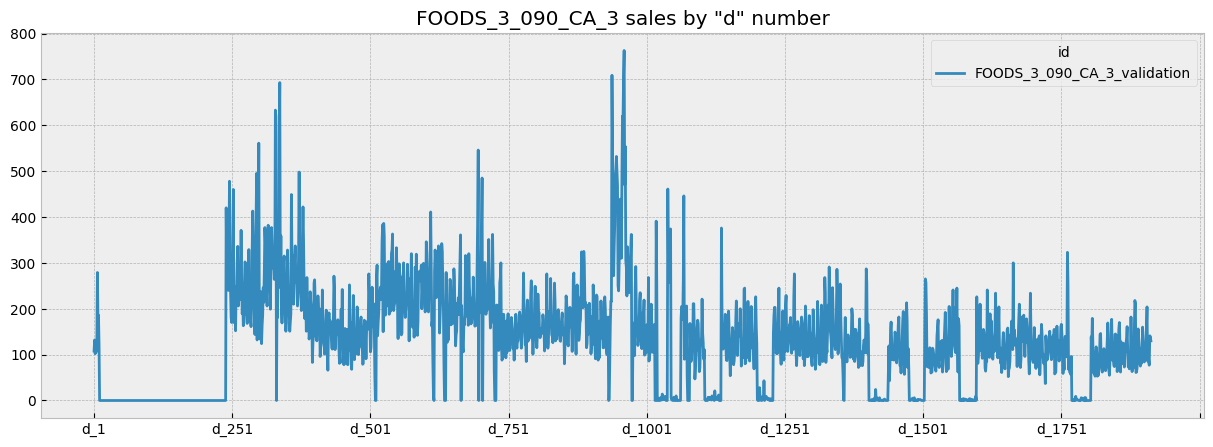

In [ ]:
d_cols=[c for c in salestv_data.columns if 'd_' in c]

#sales of a particular item
salestv_data.loc[salestv_data['id']=='FOODS_3_090_CA_3_validation'] \
.set_index('id')[d_cols] \
.T \
.plot(figsize=(15,5), title='FOODS_3_090_CA_3 sales by "d" number',color=next(color_cycle))
plt.show()

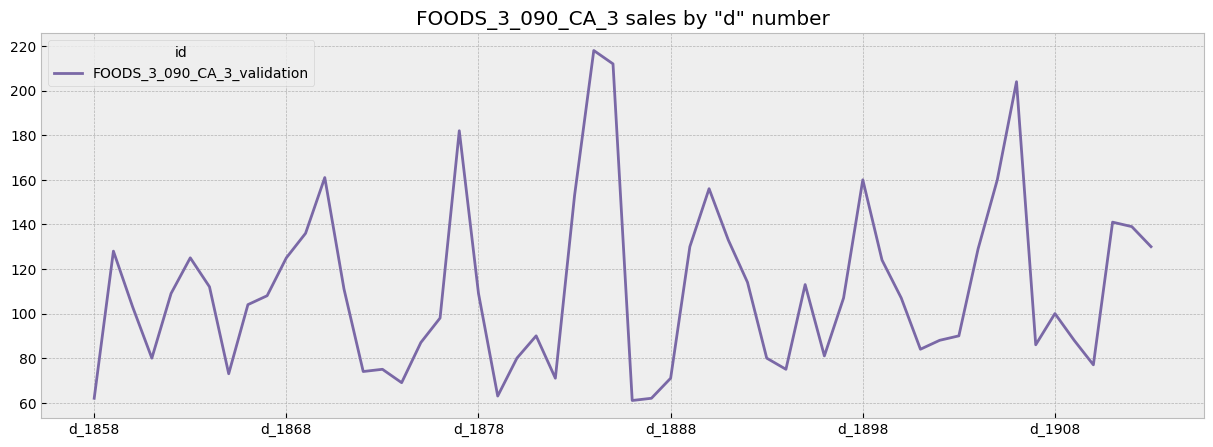

In [ ]:
#zoomed in
salestv_data.loc[salestv_data['id']=='FOODS_3_090_CA_3_validation'] \
.set_index('id')[d_cols] \
.T.iloc[-56:] \
.plot(figsize=(15,5), title='FOODS_3_090_CA_3 sales by "d" number',color=next(color_cycle))
plt.show()

2. Plotting a random sample sales data by merging with calendar data to plot exact dates on x-axis

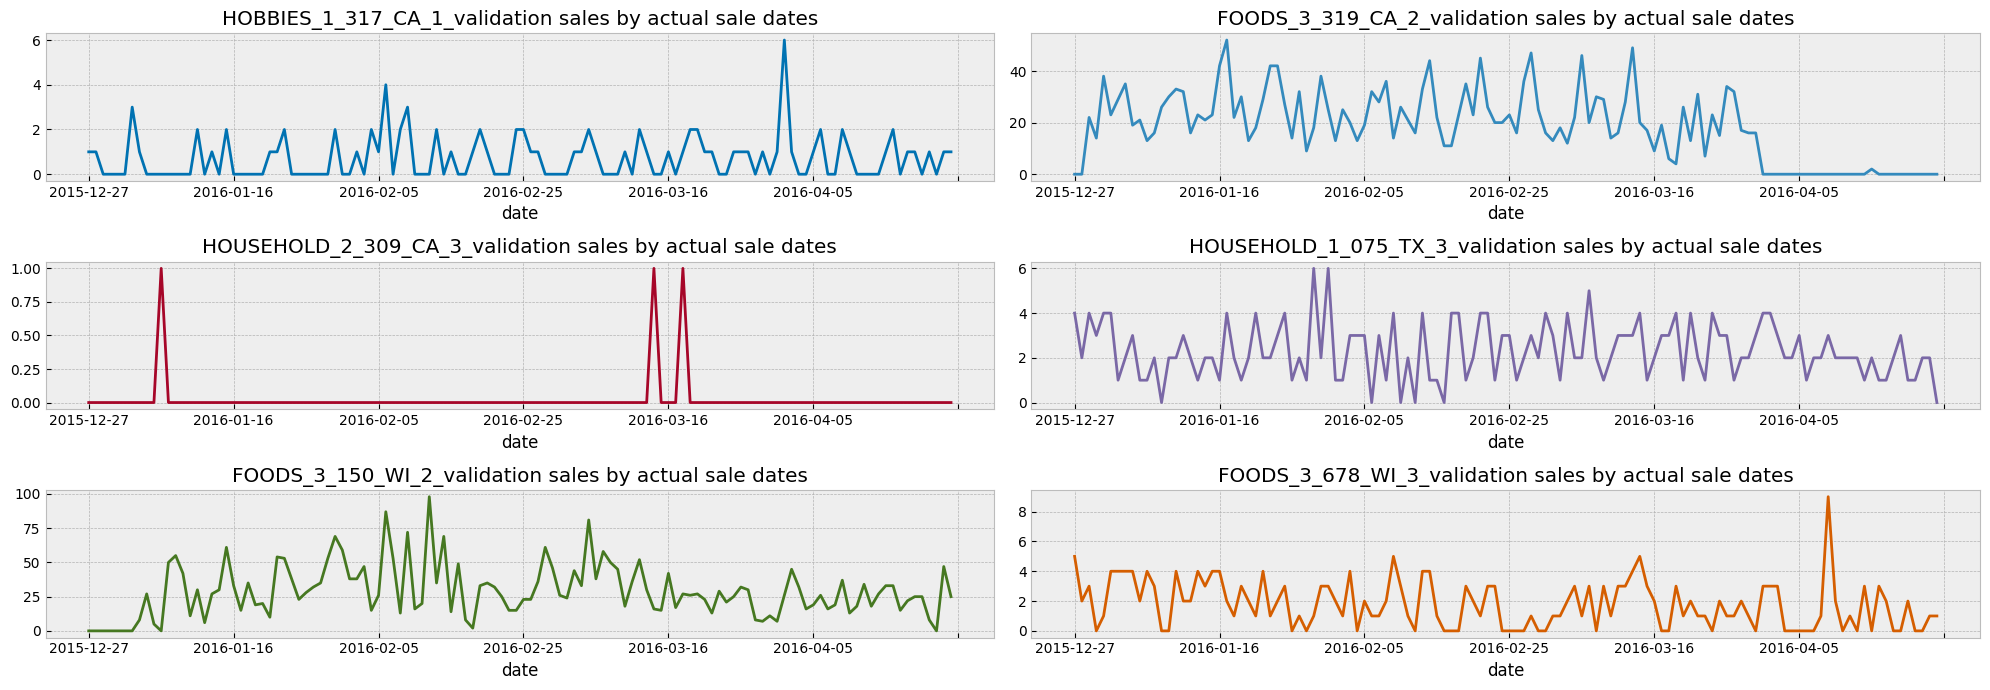

In [ ]:
ids = ['HOBBIES_1_317_CA_1_validation', 'FOODS_3_319_CA_2_validation', 'HOUSEHOLD_2_309_CA_3_validation', 'HOUSEHOLD_1_075_TX_3_validation', 'FOODS_3_150_WI_2_validation', 'FOODS_3_678_WI_3_validation']
examples = []

# General function to extract specific item Id values from sales_train_evaluation dataset
for i in range(len(ids)):
    # Merge calendar date with sales_train_evaluation date
    examples.append(salestv_data.loc[salestv_data['id']== ids[i]][d_cols].T.iloc[-120:]) # Fetch a specific Id and transform it as column
    examples[i] = examples[i].rename(columns={examples[i].columns.values[0] : ids[i]}) # Rename column e.g 8412 (location Id) to the proper name
    examples[i] = examples[i].reset_index().rename(columns={'index':'d'}) # Reset index so, d_cols are not index and then, rename index as d
    examples[i] = examples[i].merge(cal_data) # Merge two dataframe on the bases of column named d


graph_ids = [0,1,2,3,4,5]
fig, axs = plt.subplots(3, 2, figsize=(15, 10))
if len(graph_ids) != 1 : axs=axs.flatten()

ax_id=0
for graph_id in graph_ids:
    # Set date as the index of dataframe to be plotted properly and only fetch specific Id sales value
    examples[graph_id].set_index('date')[ids[graph_id]] \
    .plot(figsize=(20,7), color=next(color_cycle), title= f'{ids[graph_id]} sales by actual sale dates', ax=axs[ax_id] if len(graph_ids)!=1 else axs)

    ax_id+=1
plt.tight_layout()
plt.show()


3. Plot the sample sale snippet, kind of zooming technique

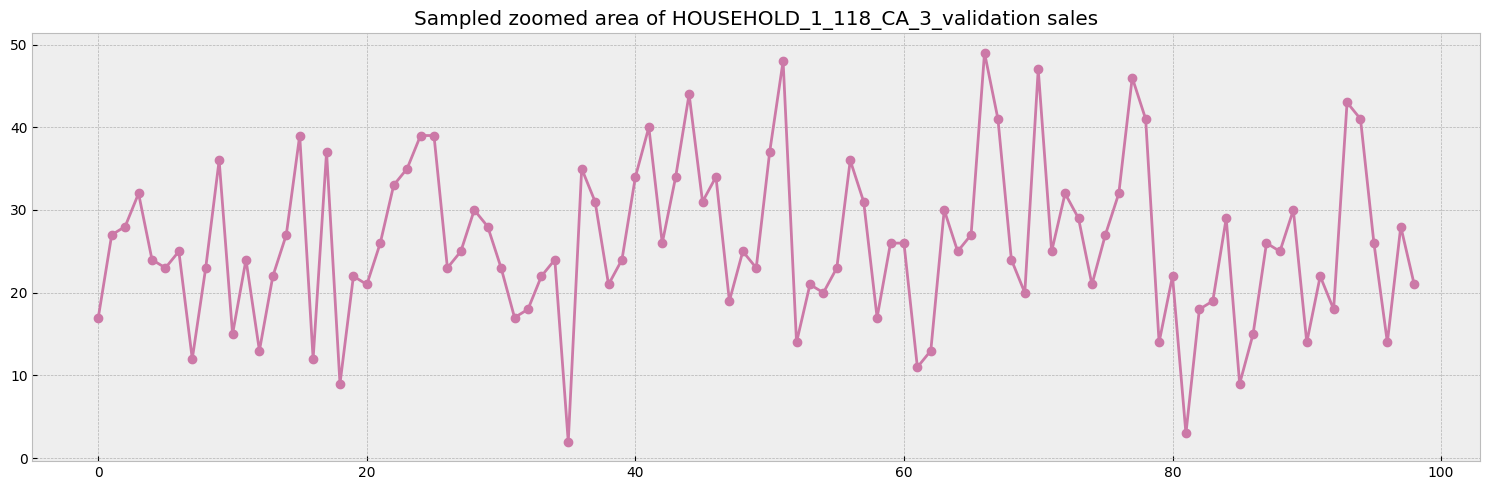

In [ ]:
graph_ids = [2]
fig, axs = plt.subplots(len(graph_ids),1,figsize=(15,10))
if len(graph_ids) != 1 : axs=axs.flatten()

ax_id=0
for graph_id in graph_ids:
    examples[graph_id][:99][ids[graph_id]].plot(figsize=(15,5),color=next(color_cycle), marker='o',
                                                title=f'Sampled zoomed area of {ids[graph_id]} sales', ax=axs[ax_id] if len(graph_ids)!=1 else axs)
    ax_id+=1
plt.tight_layout()
plt.show()

3. Deniosing sales to know underlying trends  

3.1. Wavelet denoising - calculate wavelet coefficeints and discard low coefficients

In [ ]:
# Return Mean absolute deviation value
def maddest(d, axis=None):
    return np.mean(np.absolute(d-np.mean(d,axis)), axis)

# Denoise the signal
def denoise(x, wavelet='db4',level=1):
    coeff = pywt.wavedec(x,wavelet,mode='per')
    sigma=(1/0.6745)*maddest(coeff[-level])

    uthresh=sigma*np.sqrt(2*np.log(len(x)))
    coeff[1:]=(pywt.threshold(i,value=uthresh,mode='hard') for i in coeff[1:])
    return pywt.waverec(coeff,wavelet,mode='per')

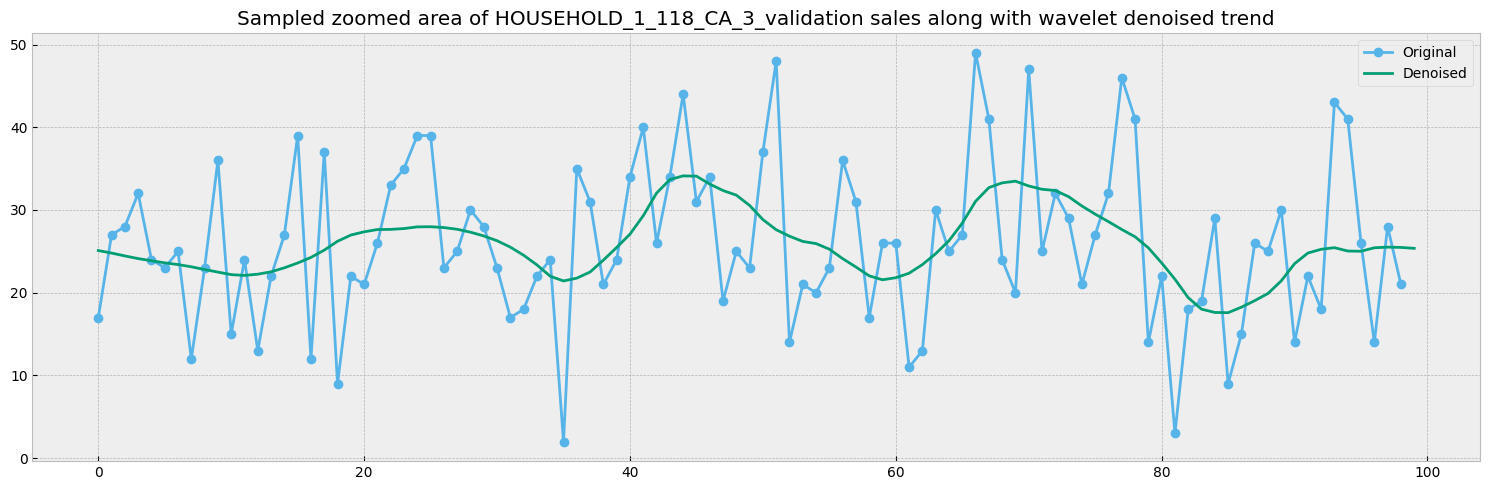

In [ ]:
fig, axs = plt.subplots(len(graph_ids),1,figsize=(15,10))
if len(graph_ids) != 1 : axs=axs.flatten()

ax_id=0
for graph_id in graph_ids:
    examples[graph_id][ids[graph_id]][:99].plot(figsize=(15,5),color=next(color_cycle), marker='o', label='Original',
                                                title=f'Sampled zoomed area of {ids[graph_id]} sales along with wavelet denoised trend', ax=axs[ax_id] if len(graph_ids)!=1 else axs)
    list_to_df(denoise(examples[graph_id][ids[graph_id]][:99])).plot(figsize=(15,5),color=next(color_cycle), label='Denoised',
                                                ax=axs[ax_id] if len(graph_ids)!=1 else axs)
    axs[ax_id].legend() if len(graph_ids)!=1 else axs.legend()
    ax_id+=1

plt.tight_layout()
plt.show()

Plotting original sales and denoised sales side-by-side for better understanding the trend

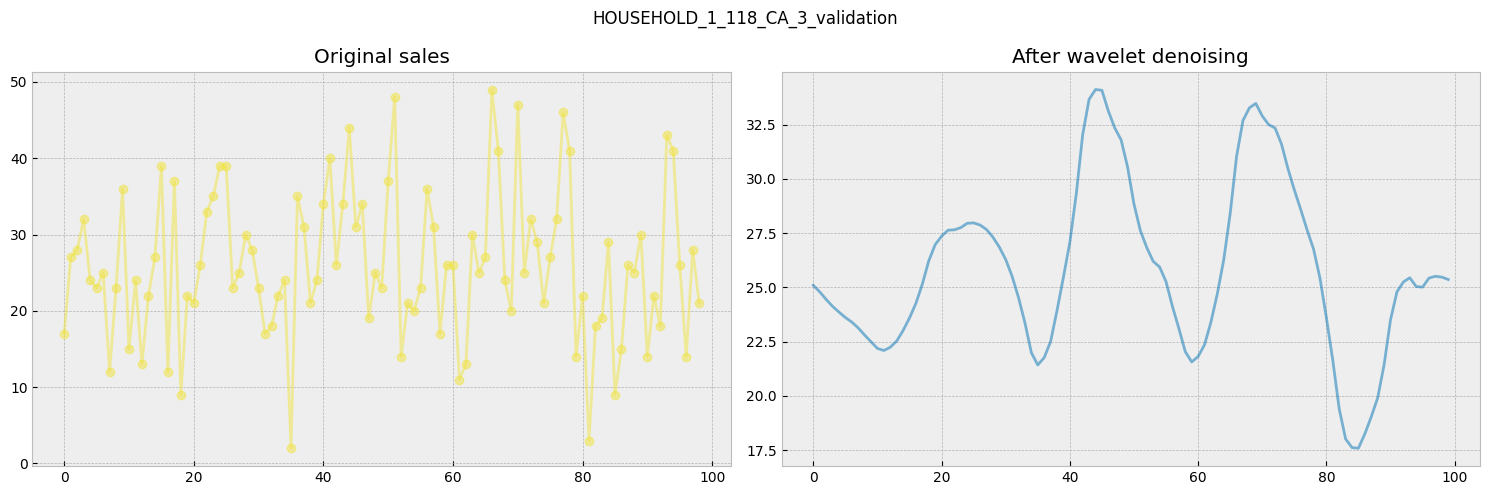

In [ ]:
fig, axs = plt.subplots(len(graph_ids),2,figsize=(30,10))
axs=axs.flatten()

ax_id=0
for graph_id in graph_ids:
    examples[graph_id][ids[graph_id]][:99].plot(figsize=(15,5),color=next(color_cycle), marker='o', alpha=0.5,
                                                title='Original sales', ax=axs[ax_id])
    ax_id+=1
    list_to_df(denoise(examples[graph_id][ids[graph_id]][:99])).plot(figsize=(15,5),color=next(color_cycle), alpha=0.5,
                                                                     title='After wavelet denoising', ax=axs[ax_id])
    ax_id+=1
    plt.suptitle(f'{ids[graph_id]}')
plt.tight_layout()
plt.show()

3.2. Average smoothing or rolling mean denoising - A method that uses window & stride concept to denoise the data by taking mean of windowed elements and moving the window by stride

In [ ]:
def average_smoothing(x, window=3, stride=1):
    new_x = []
    start = 0
    end = window
    while end<=len(x):
        new_x.extend(np.ones(end-start)*np.mean(x[start:end]))
        start = start + stride
        end = end + stride
    return np.array(new_x)

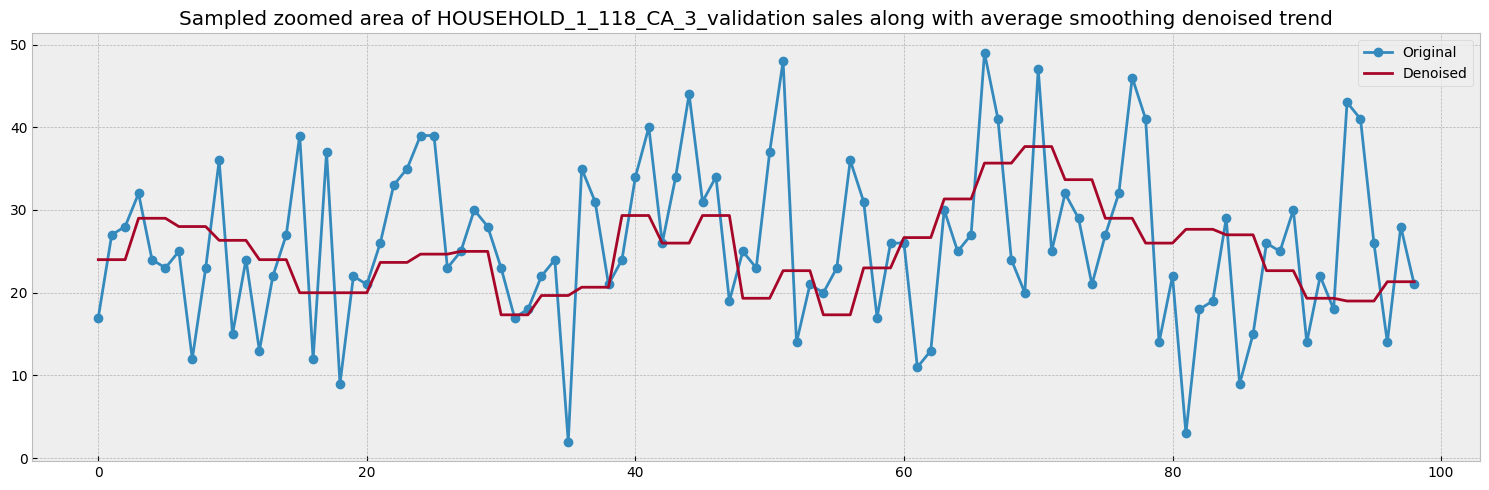

In [ ]:
fig, axs = plt.subplots(len(graph_ids),1,figsize=(15,10))
if len(graph_ids) != 1 : axs=axs.flatten()

ax_id=0
for graph_id in graph_ids:
    examples[graph_id][ids[graph_id]][:99].plot(figsize=(15,5),color=next(color_cycle), marker='o', label='Original',
                                                title=f'Sampled zoomed area of {ids[graph_id]} sales along with average smoothing denoised trend', ax=axs[ax_id] if len(graph_ids)!=1 else axs)
    list_to_df(average_smoothing(examples[graph_id][ids[graph_id]])[:99]).plot(figsize=(15,5),color=next(color_cycle), label='Denoised',
                                                ax=axs[ax_id] if len(graph_ids)!=1 else axs)
    axs[ax_id].legend() if len(graph_ids)!=1 else axs.legend()
    ax_id+=1

plt.tight_layout()
plt.show()

Plotting original sales and denoised sales side-by-side for better understanding the trend

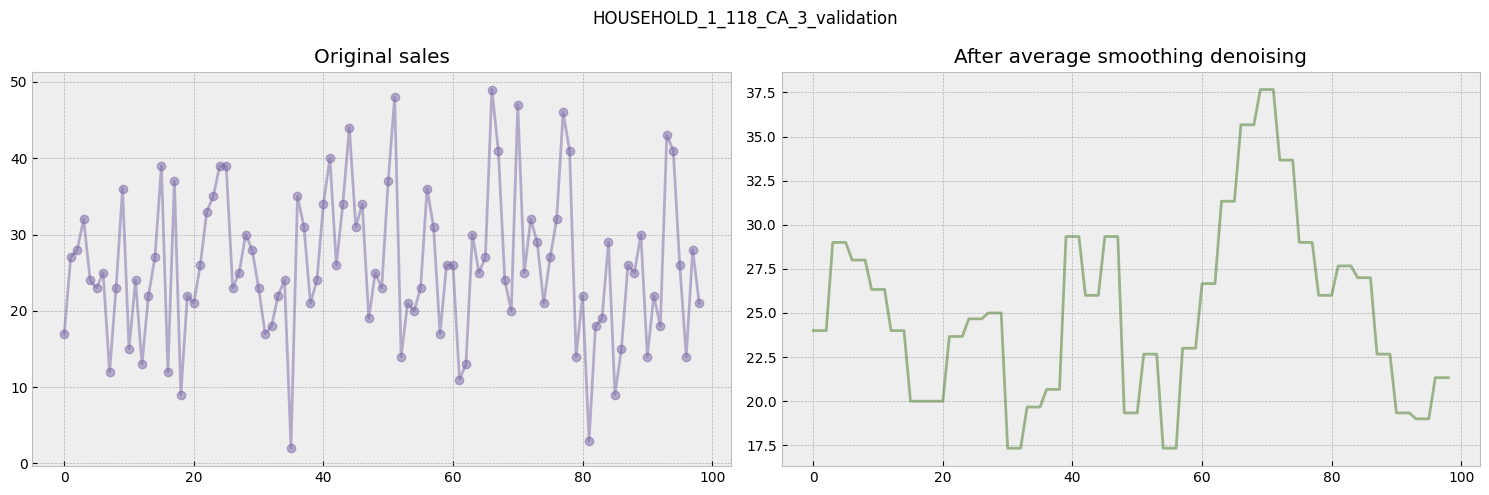

In [ ]:
fig, axs = plt.subplots(len(graph_ids),2,figsize=(30,10))
axs=axs.flatten()

ax_id=0
for graph_id in graph_ids:
    examples[graph_id][ids[graph_id]][:99].plot(figsize=(15,5),color=next(color_cycle), marker='o', alpha=0.5,
                                                title='Original sales', ax=axs[ax_id])
    ax_id+=1
    list_to_df(average_smoothing(examples[graph_id][ids[graph_id]])[:99]).plot(figsize=(15,5),color=next(color_cycle), alpha=0.5,
                                                                     title='After average smoothing denoising', ax=axs[ax_id])
    ax_id+=1
    plt.suptitle(f'{ids[graph_id]}')
plt.tight_layout()
plt.show()

# Sales broken down by day of the week, month & year

In [ ]:
examples[0].groupby('wday')[ids[0]].mean()

wday
1    175.091241
2    143.956204
3    118.219780
4    105.241758
5    107.490842
6    117.087912
7    149.333333
Name: FOODS_3_090_CA_3_validation, dtype: float64

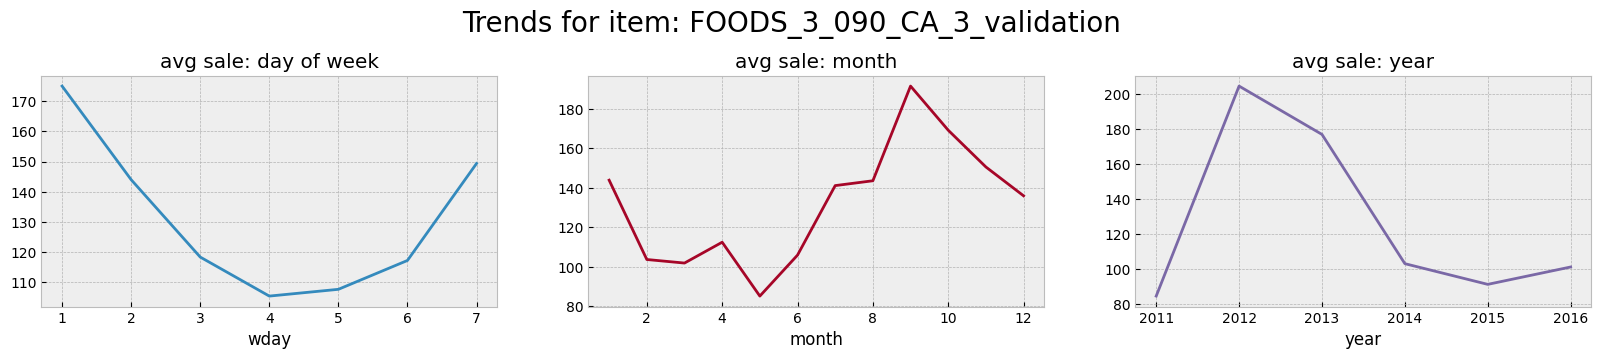

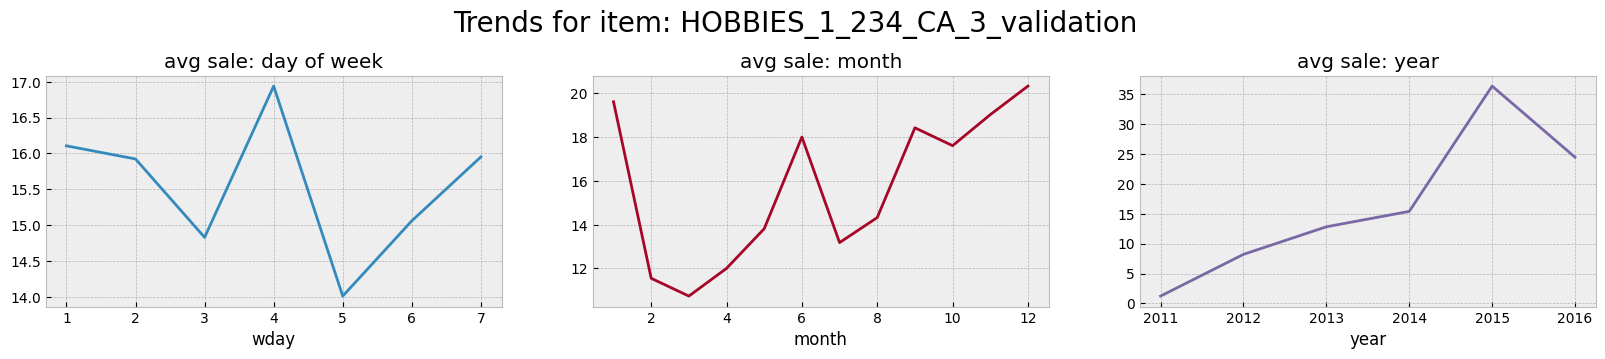

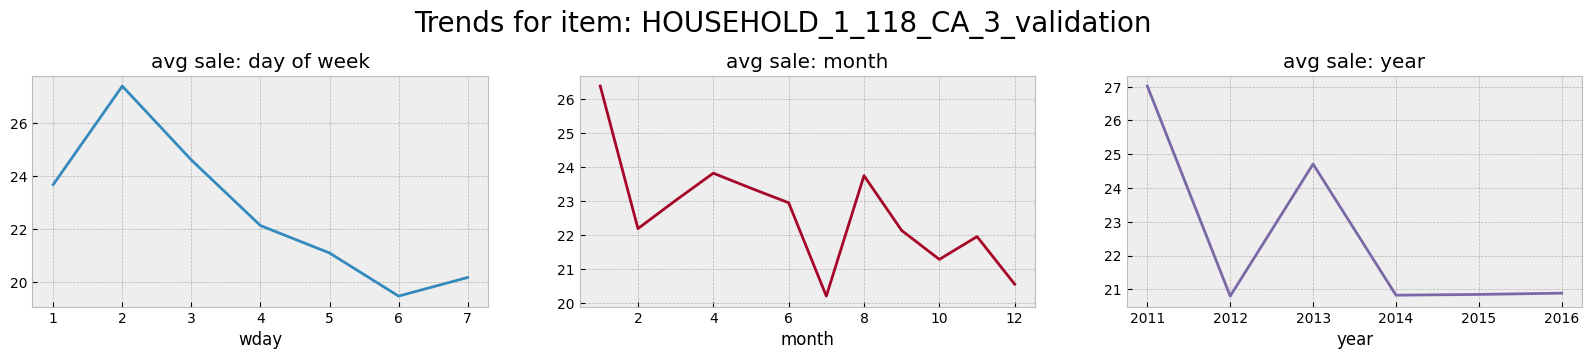

In [ ]:
for i in [0, 1, 2]:
    fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(20,3))
    # Groupby wday colum and do mean or count etc. to values of other columns & then, extract the specific sales Id column
    examples[i].groupby('wday')[ids[i]].mean() \
    .plot(kind='line', title='avg sale: day of week', color=color_pal[0], ax=ax1)

    examples[i].groupby('month')[ids[i]].mean() \
    .plot(kind='line', title='avg sale: month', color=color_pal[1], ax=ax2)

    examples[i].groupby('year')[ids[i]].mean() \
    .plot(kind='line', title='avg sale: year', color=color_pal[2], ax=ax3)

    fig.suptitle(f'Trends for item: {ids[i]}', size=20, y=1.1)

# Visualizing random 20 different items with their sales to analyze some trends

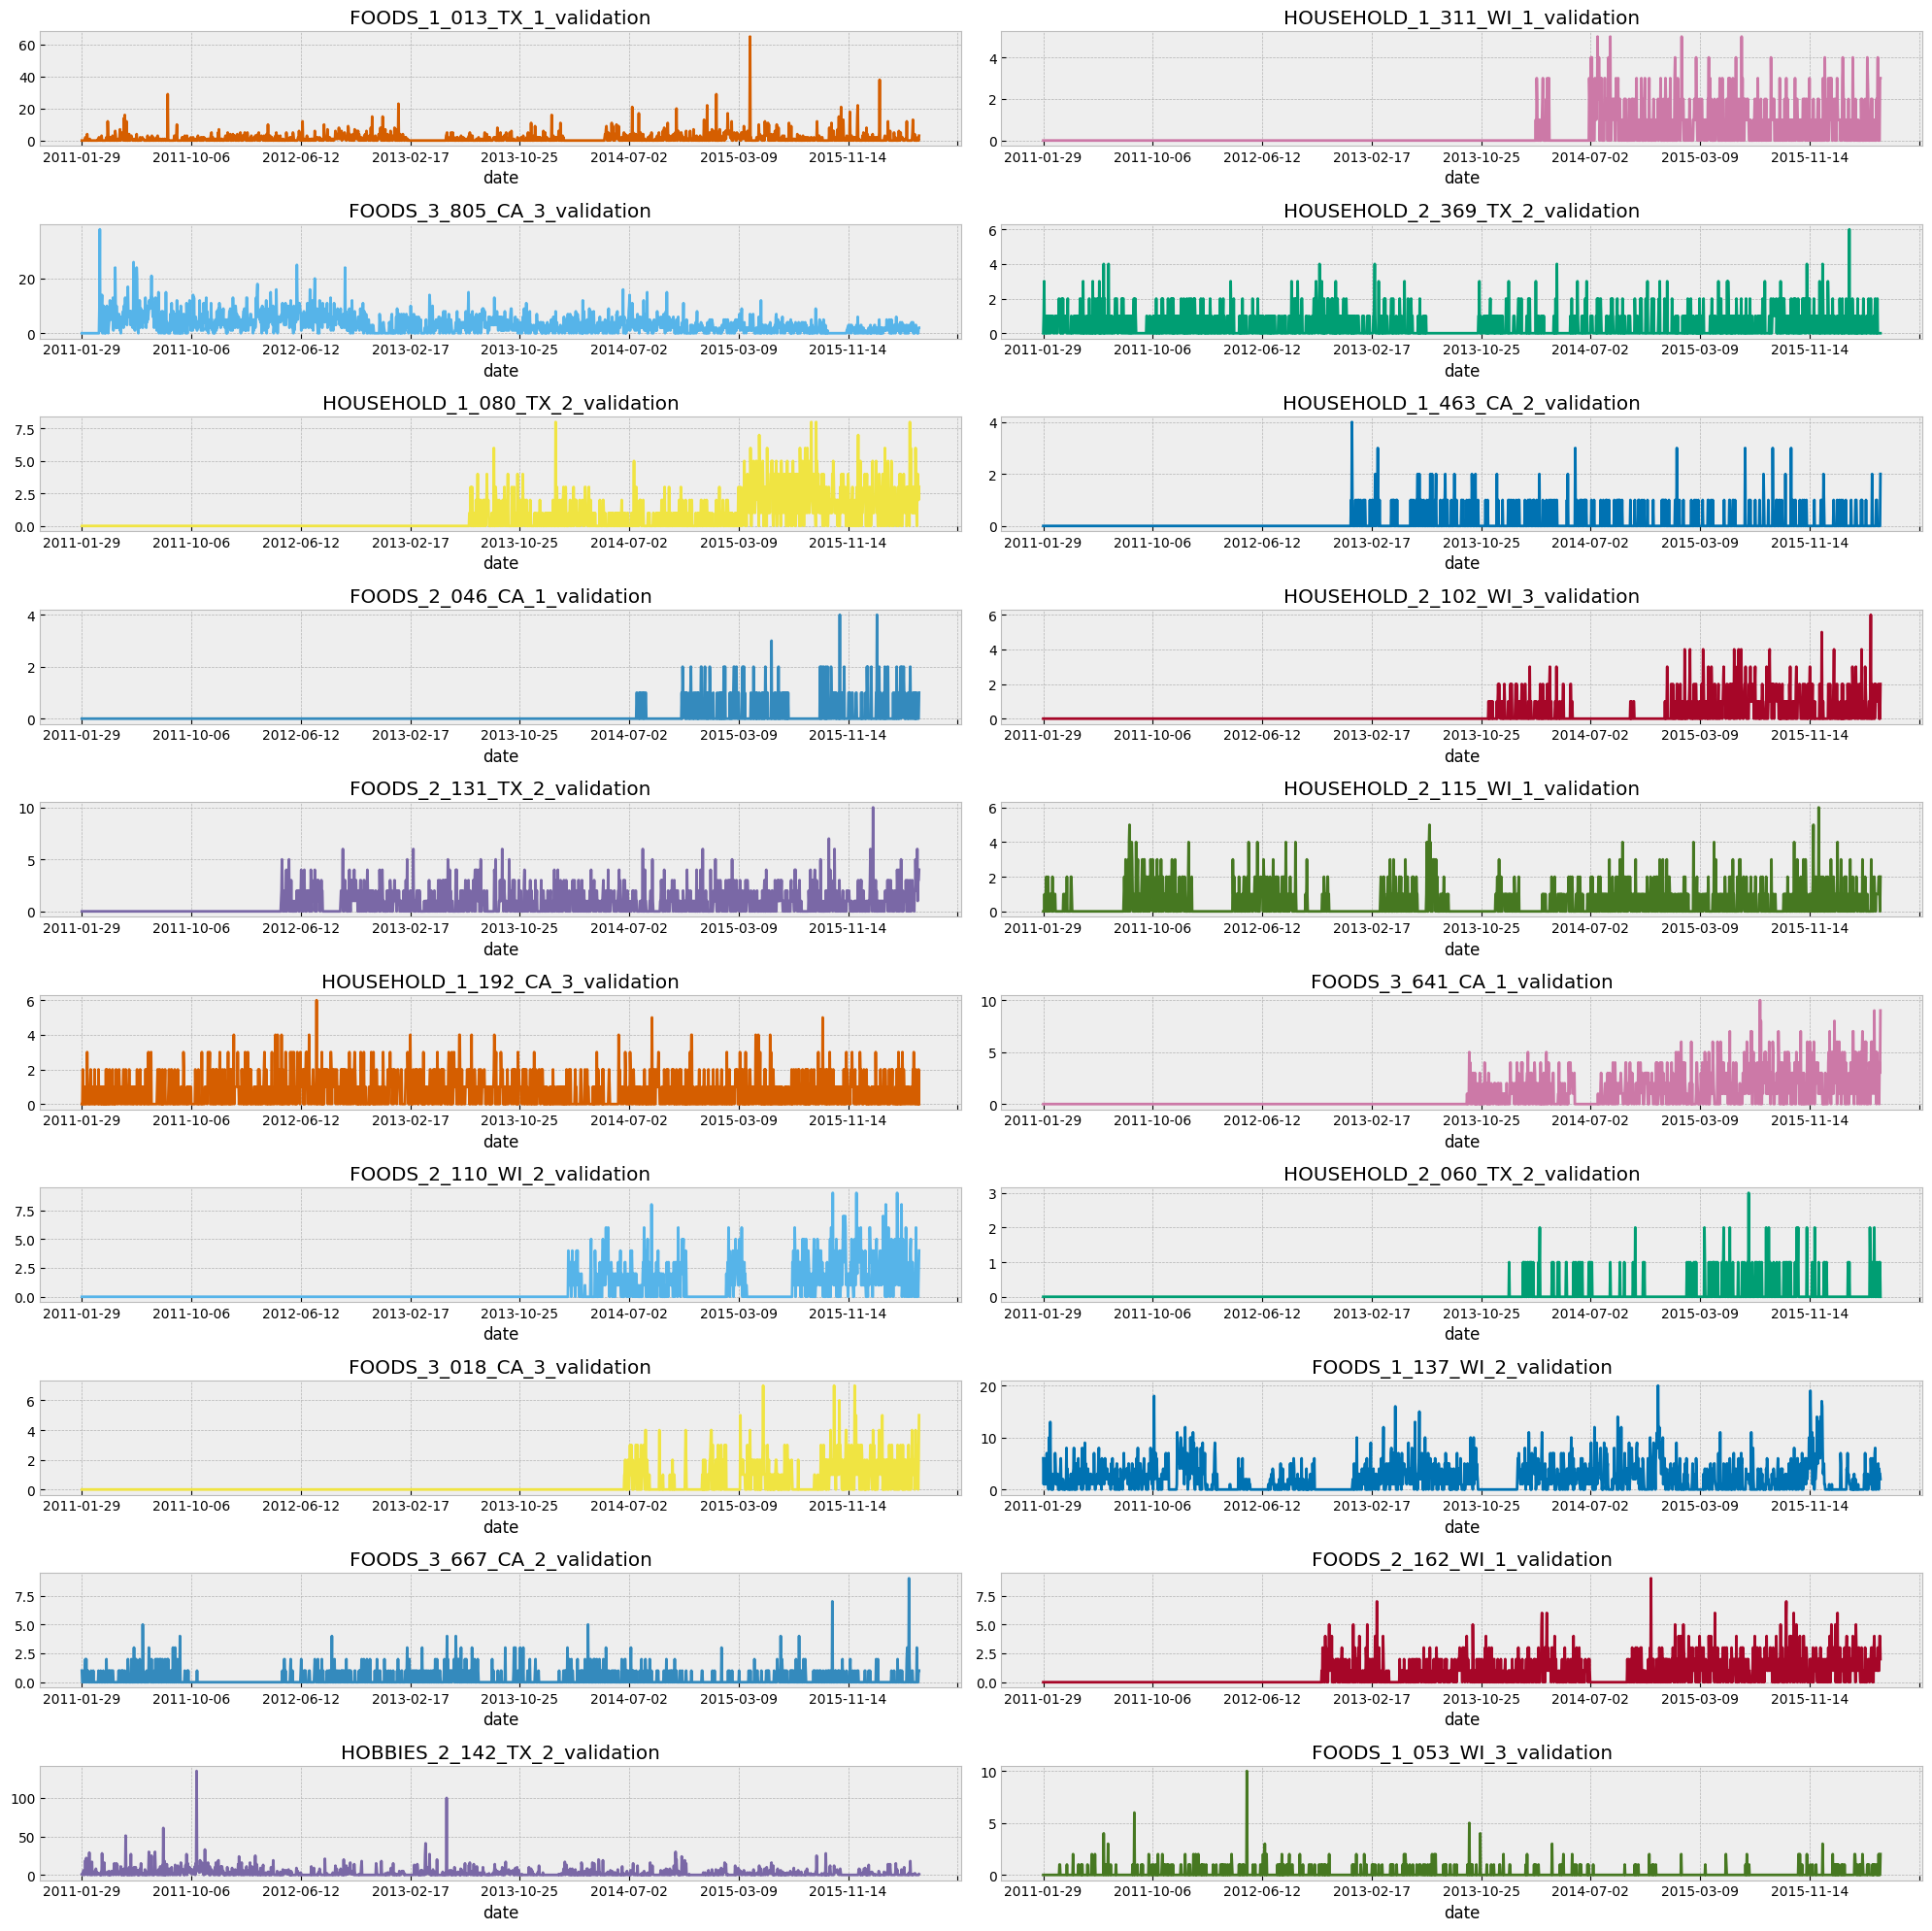

In [ ]:
twenty_examples = salestv_data.sample(20, random_state=529) # Sample random 20 samples from the salestv dataframe
list_of_sampled_id = list(twenty_examples['id']) # Extract the list of sampled id of items so as to just keep these id values in the dataframe eventually
twenty_examples = twenty_examples.set_index('id')[d_cols].T # Set the index of dataframe to be id column, select only the d columns & transform the
twenty_examples = twenty_examples.reset_index().rename(columns={'index':'d'})
twenty_examples = twenty_examples.merge(cal_data)
twenty_examples = twenty_examples.set_index('date')[list_of_sampled_id]


fig, axs = plt.subplots(10,2,figsize=(20,20))
axs = axs.flatten()

axs_id=0
for item in twenty_examples.columns:
    twenty_examples[item].plot(title=item, color=next(color_cycle), ax=axs[axs_id])
    axs_id+=1
plt.tight_layout()
plt.show()

# Sales over time by category type

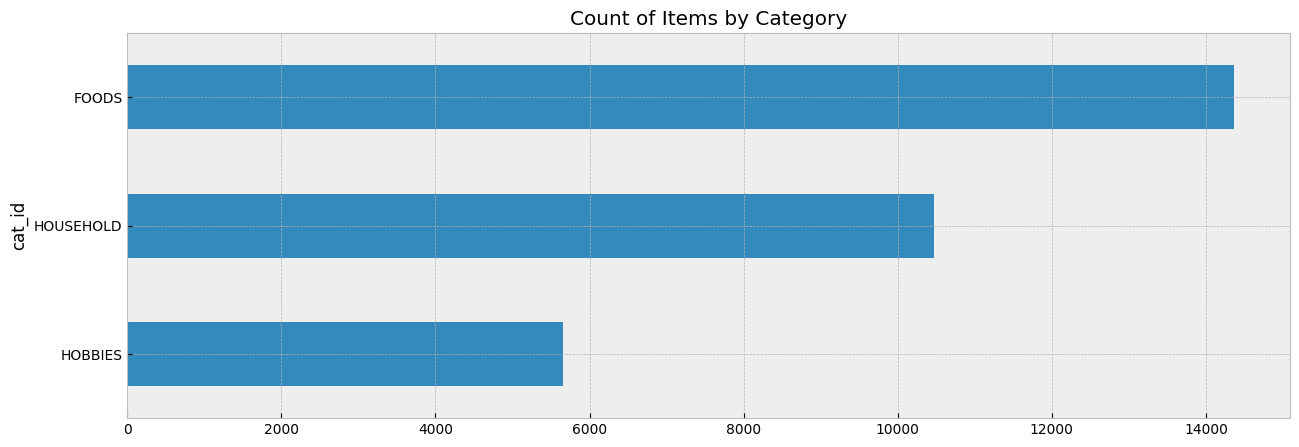

In [ ]:
# Plot of count of Items by category
salestv_data.groupby('cat_id').count()['id'].sort_values().plot(kind='barh', title='Count of Items by Category', figsize=(15,5))
plt.show()

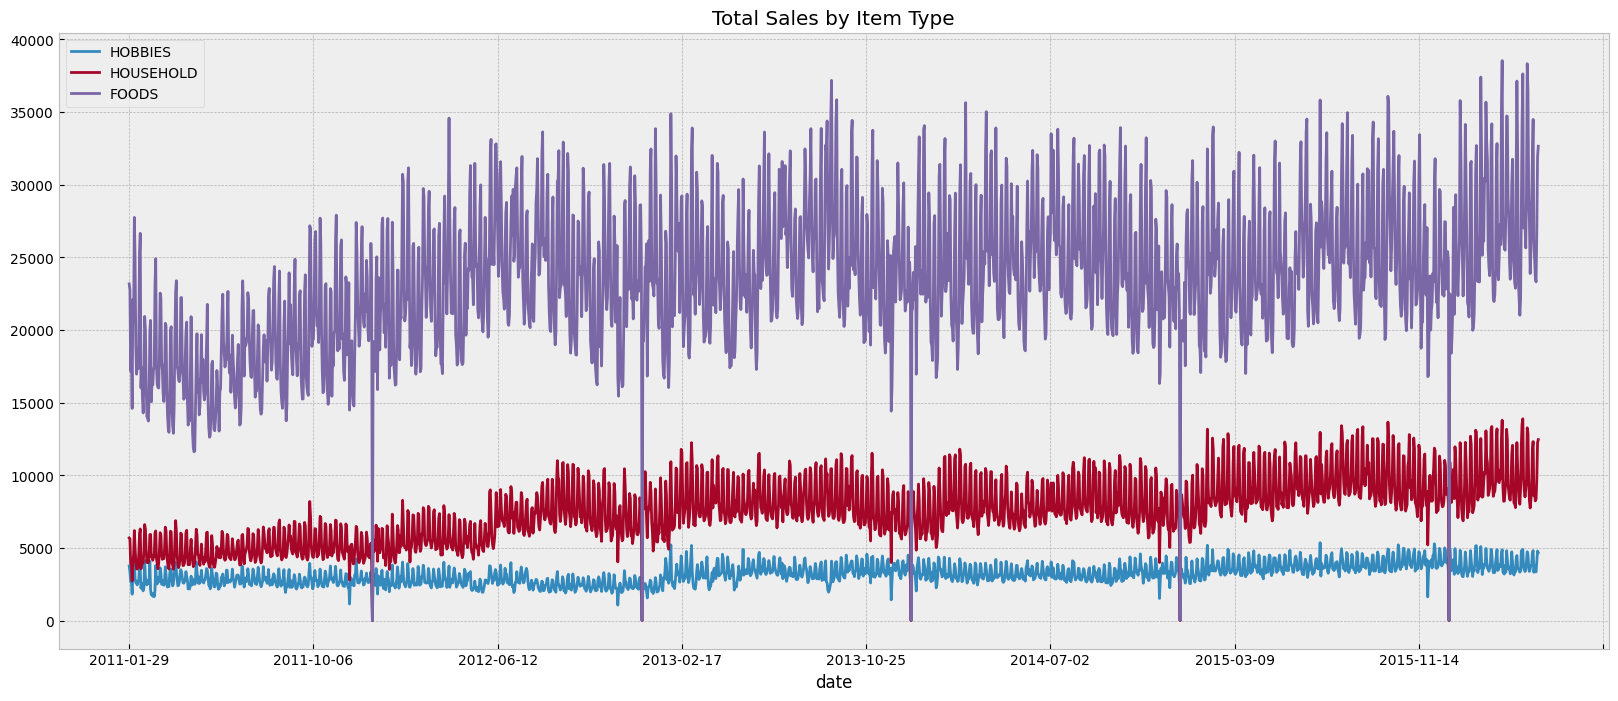

In [ ]:
past_sales_item = salestv_data.set_index('id')[d_cols].T \
.merge(cal_data.set_index('d')['date'], left_index=True, right_index=True).set_index('date')

#print(past_sales)
for i in salestv_data['cat_id'].unique():
    items_col = [c for c in past_sales_item.columns if i in c]
    past_sales_item[items_col].sum(axis=1).plot(figsize=(20,8), title='Total Sales by Item Type')

plt.legend(salestv_data['cat_id'].unique())
plt.show()

Roll out of Items being sold

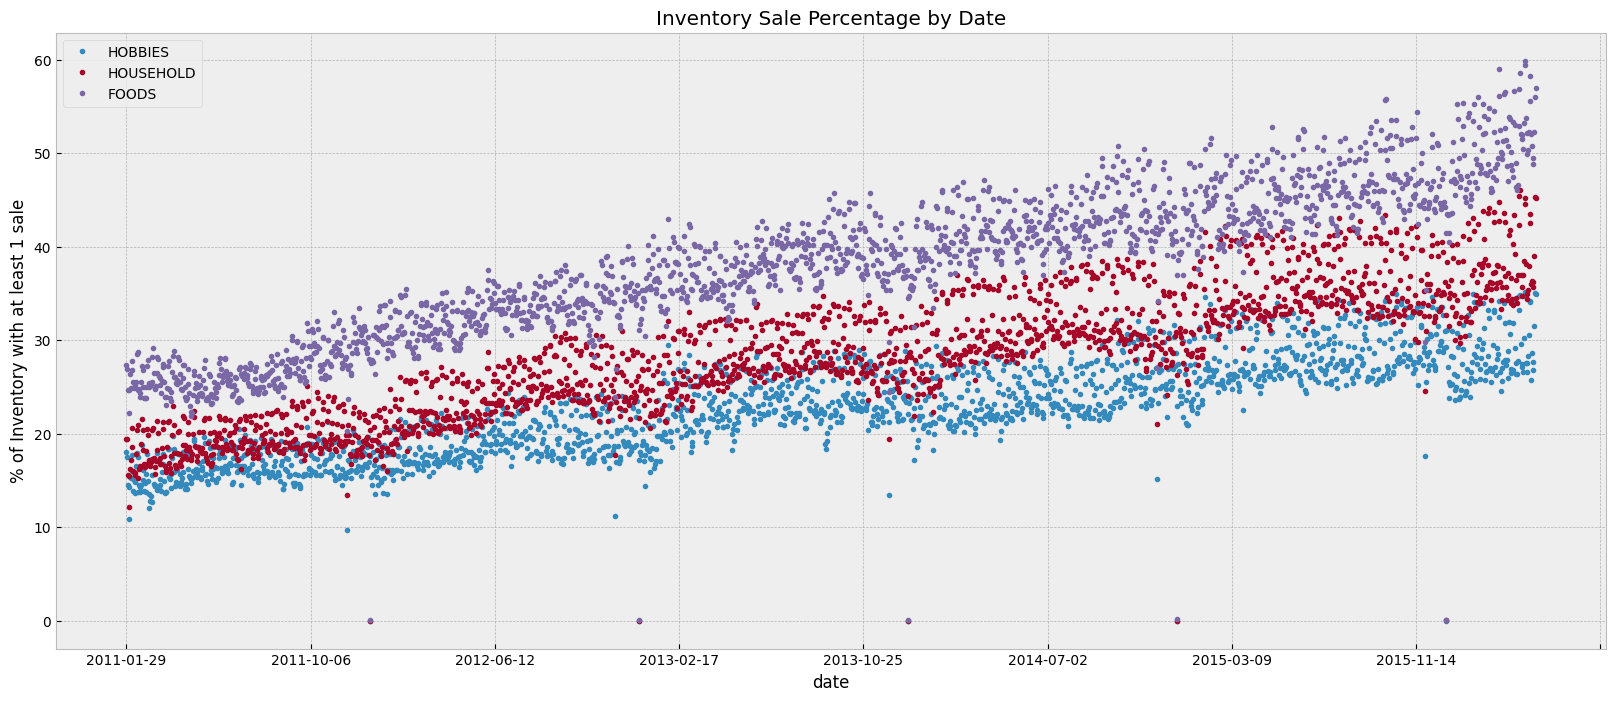

In [ ]:
past_sales_clipped = past_sales_item.clip(0,1) # Give the value of 0 or 1 to rows with no value or some value respectively, trim values to input thresholds

for i in salestv_data['cat_id'].unique():
    items_col = [c for c in past_sales_clipped.columns if i in c]
    (past_sales_clipped[items_col].mean(axis=1)*100).plot(figsize=(20,8), style='.', title='Inventory Sale Percentage by Date')
plt.ylabel('% of Inventory with at least 1 sale')
plt.legend(salestv_data['cat_id'].unique())
plt.show()


# Sales by store category

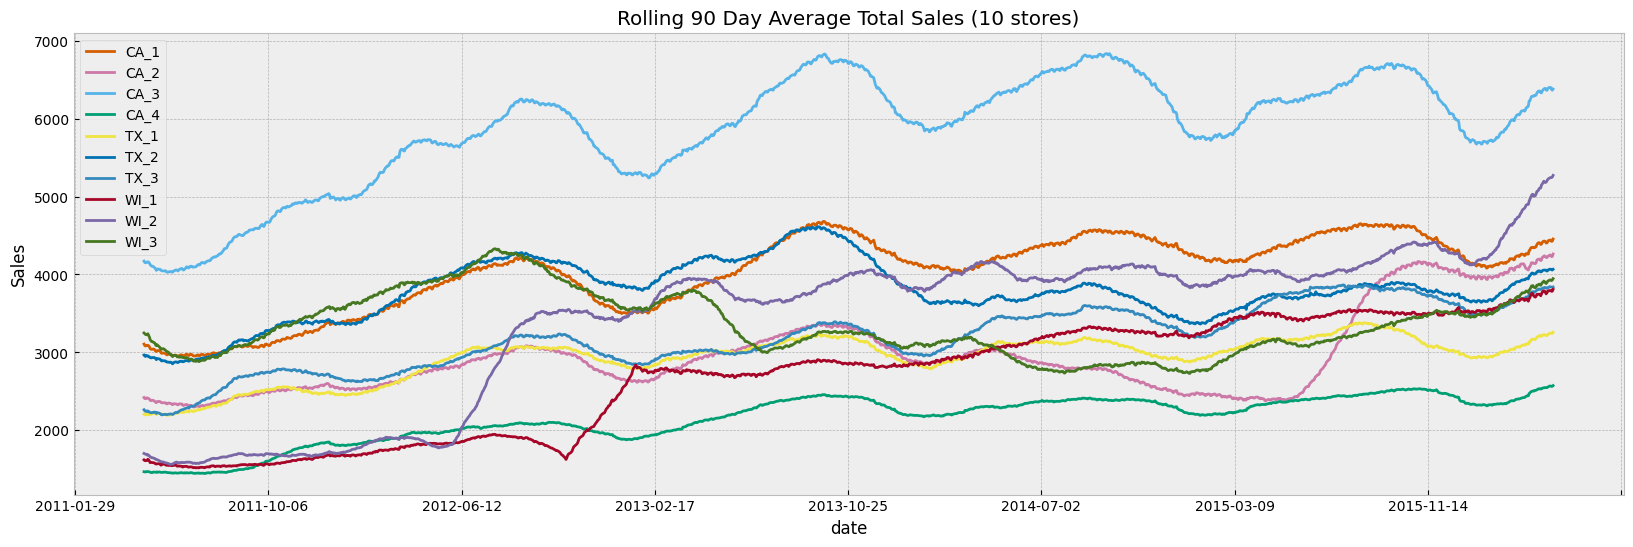

In [ ]:
store_list = sellp_data['store_id'].unique()
for i in store_list:
    # Rolling 90 day average of sales
    store_items = [c for c in past_sales_item.columns if i in c]
    past_sales_item[store_items].sum(axis=1).rolling(90).mean() \
    .plot(kind='line', figsize=(20,6), color=next(color_cycle), title='Rolling 90 Day Average Total Sales (10 stores)')

plt.ylabel('Sales')
plt.legend(store_list)
plt.show()

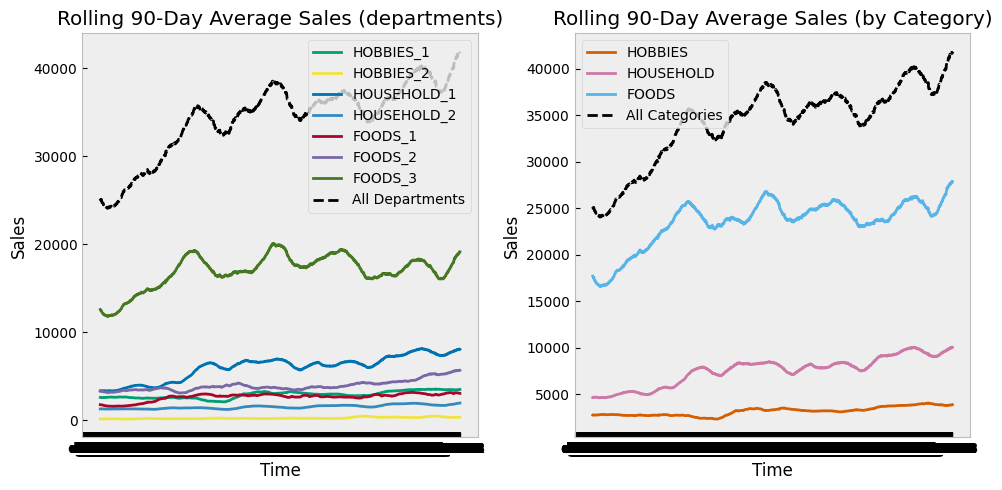

In [ ]:
# Get unique department and category IDs
depts = salestv_data['dept_id'].unique()
cats = salestv_data['cat_id'].unique()

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs = axs.flatten()

for i in depts:
    dept_data = salestv_data[salestv_data['dept_id'] == i]
    data = dept_data.iloc[:, -1913:].T.sum(axis=1).rolling(90).mean()
    axs[0].plot(data, color=next(color_cycle), label=f'{i}')

total_sales = salestv_data.iloc[:, -1913:].T.sum(axis=1).rolling(90).mean()
axs[0].plot(total_sales, color='black', linestyle='--', label='All Departments')

axs[0].set_title('Rolling 90-Day Average Sales (departments)')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Sales')
axs[0].grid(False)  # Disable grid
axs[0].legend()

for i in cats:
    cat_sales = salestv_data[salestv_data['cat_id'] == i]
    data = cat_sales.iloc[:, -1913:].T.sum(axis=1).rolling(90).mean()
    axs[1].plot(data, color=next(color_cycle), label=f'{i}')

axs[1].plot(total_sales, color='black', linestyle='--', label='All Categories')

axs[1].set_title('Rolling 90-Day Average Sales (by Category)')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Sales')
axs[1].grid(False)  # Disable grid
axs[1].legend()

plt.tight_layout()
plt.show()

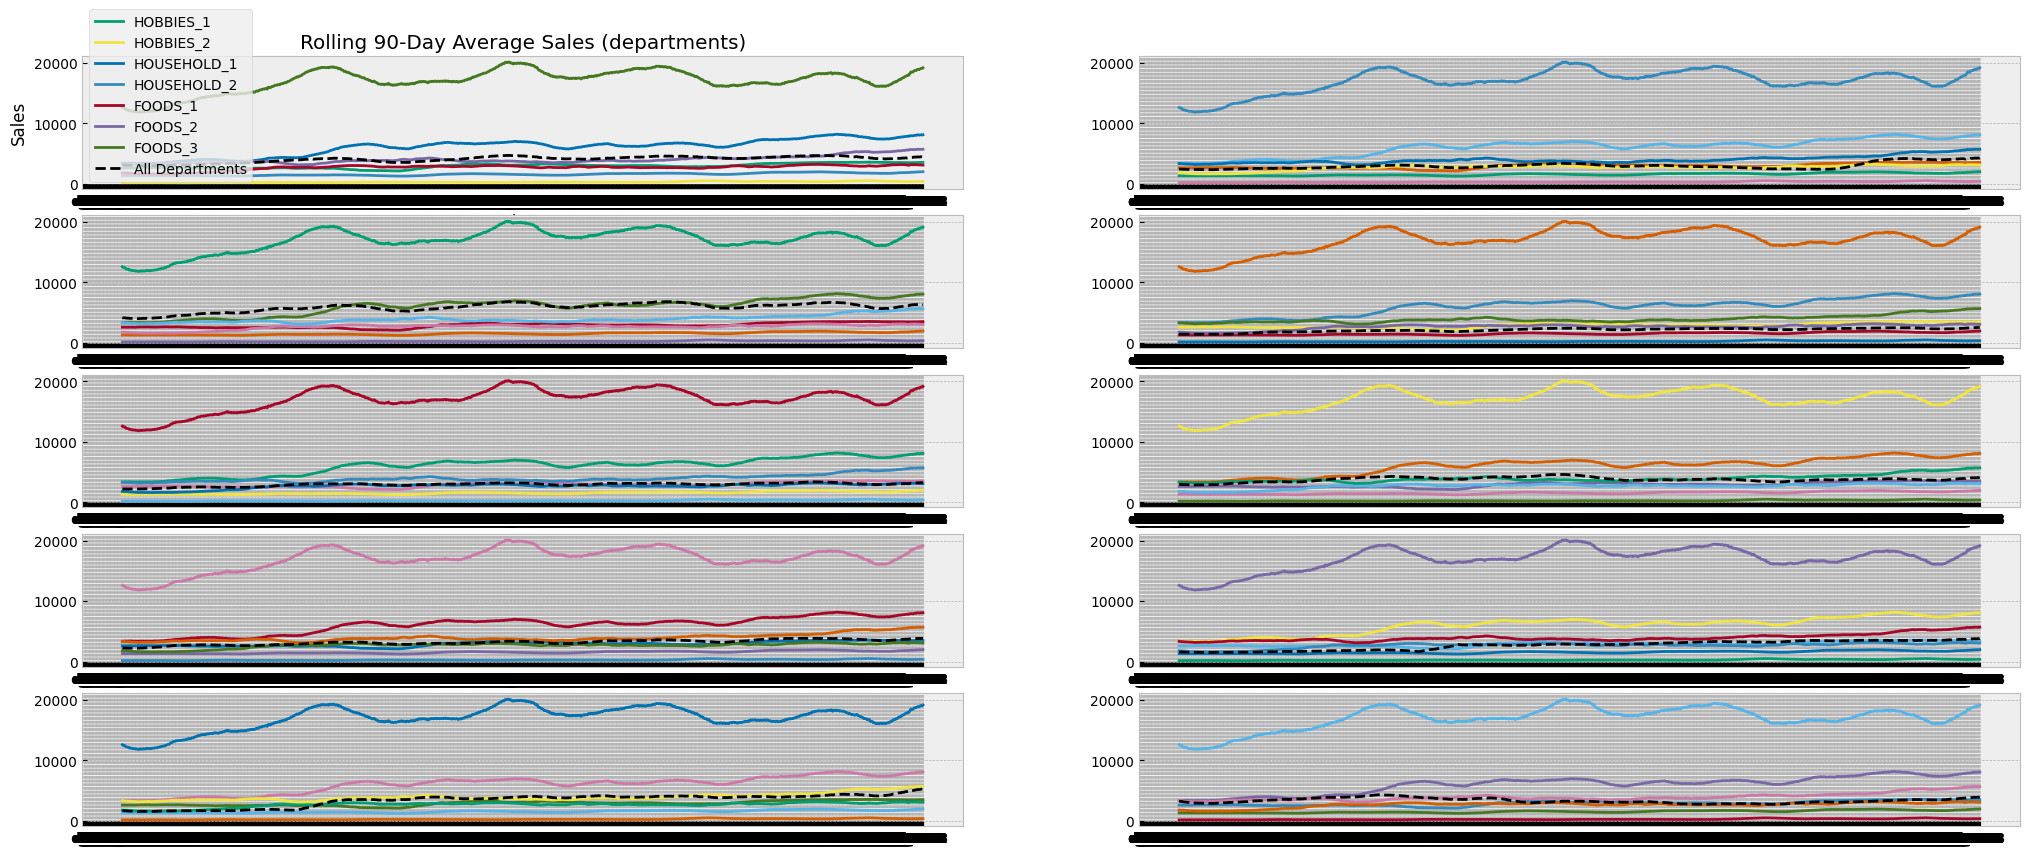

In [ ]:
# Get unique department and category IDs
depts = salestv_data['dept_id'].unique()
cats = salestv_data['cat_id'].unique()

fig, axs = plt.subplots(5, 2, figsize=(25, 10))
axs = axs.flatten()
stores = salestv_data['store_id'].unique()
for i, store in enumerate(stores):
  store_data = salestv_data[salestv_data['store_id'] == store]
  total_sales = store_data.iloc[:, -1913:].T.sum(axis=1).rolling(90).mean()

  for j in depts:
    dept_data = salestv_data[salestv_data['dept_id'] == j]
    data = dept_data.iloc[:, -1913:].T.sum(axis=1).rolling(90).mean()
    axs[i].plot(data, color=next(color_cycle), label=f'{j}')

  axs[i].plot(total_sales, color='black', linestyle='--', label='All Departments')

axs[0].set_title('Rolling 90-Day Average Sales (departments)')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Sales')
axs[0].grid(False)  # Disable grid
axs[0].legend()


In [ ]:
for i, store in enumerate(stores):
  print(i)

(0, 'CA_1')
(1, 'CA_2')
(2, 'CA_3')
(3, 'CA_4')
(4, 'TX_1')
(5, 'TX_2')
(6, 'TX_3')
(7, 'WI_1')
(8, 'WI_2')
(9, 'WI_3')


In [ ]:
dept_data = salestv_data[salestv_data['dept_id']=='HOBBIES_1']
dept_data

id        item_id    dept_id   cat_id  \
0      HOBBIES_1_001_CA_1_validation  HOBBIES_1_001  HOBBIES_1  HOBBIES   
1      HOBBIES_1_002_CA_1_validation  HOBBIES_1_002  HOBBIES_1  HOBBIES   
2      HOBBIES_1_003_CA_1_validation  HOBBIES_1_003  HOBBIES_1  HOBBIES   
3      HOBBIES_1_004_CA_1_validation  HOBBIES_1_004  HOBBIES_1  HOBBIES   
4      HOBBIES_1_005_CA_1_validation  HOBBIES_1_005  HOBBIES_1  HOBBIES   
...                              ...            ...        ...      ...   
27852  HOBBIES_1_420_WI_3_validation  HOBBIES_1_420  HOBBIES_1  HOBBIES   
27853  HOBBIES_1_421_WI_3_validation  HOBBIES_1_421  HOBBIES_1  HOBBIES   
27854  HOBBIES_1_422_WI_3_validation  HOBBIES_1_422  HOBBIES_1  HOBBIES   
27855  HOBBIES_1_423_WI_3_validation  HOBBIES_1_423  HOBBIES_1  HOBBIES   
27856  HOBBIES_1_424_WI_3_validation  HOBBIES_1_424  HOBBIES_1  HOBBIES   

      store_id state_id  d_1  d_2  d_3  d_4  d_5  d_6  d_7  d_8  d_9  d_10  \
0         CA_1       CA    0    0    0    0    0    0    0    0    0     0   
1         CA_1       CA    0    0    0    0    0    0    0    0    0     0   
2         CA_1       CA    0    0    0    0    0    0    0    0    0     0   
3         CA_1       CA    0    0    0    0    0    0    0    0    0     0   
4         CA_1       CA    0    0    0    0    0    0    0    0    0     0   
...        ...      ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   
27852     WI_3       WI    1    1    0    3    0    0    0    0    4     0   
27853     WI_3       WI    0    0    0    0    0    0    0    0    0     0   
27854     WI_3       WI    1    2    0    0    0    1    0    0    2     0   
27855     WI_3       WI    0    0    0    0    0    0    0    0    0     0   
27856     WI_3       WI    0    0    0    0    0    0    0    2    3     1   

       d_11  d_12  d_13  d_14  d_15  d_16  d_17  d_18  d_19  ...  d_1889  \
0         0     0     0     0     0     0     0     0     0  ...       0   
1         0     0     0     0     0     0     0     0     0  ...       0   
2         0     0     0     0     0     0     0     0     0  ...       0   
3         0     0     0     0     0     0     0     0     0  ...       0   
4         0     0     0     0     0     0     0     0     0  ...       4   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...  ...     ...   
27852     1     1     1     0     2     2     0     1     0  ...       2   
27853     0     0     0     0     0     0     0     0     0  ...       0   
27854     2     0     0     0     0     0     1     1     1  ...       0   
27855     0     0     0     0     0     0     0     0     0  ...       0   
27856     0     0     1     0     1     1     0     0     0  ...       0   

       d_1890  d_1891  d_1892  d_1893  d_1894  d_1895  d_1896  d_1897  d_1898  \
0           0       0       1       0       4       2       3       0       1   
1           0       0       0       0       0       0       0       0       0   
2           0       0       1       0       0       0       1       0       0   
3           3       1       2       1       3       1       0       2       5   
4           0       1       4       0       1       0       1       0       1   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
27852       1       1       0       0       1       0       0       1       0   
27853       0       1       0       0       0       0       0       0       0   
27854       0       0       0       0       0       1       0       0       0   
27855       1       0       0       0       0       0       0       0       0   
27856       0       1       0       0       1       1       0       0       0   

       d_1899  d_1900  d_1901  d_1902  d_1903  d_1904  d_1905  d_1906  d_1907  \
0           2       0       0       0       1       1       3       0       1   
1           0       0       0       0       0       0       0       0       0   
2           0       0       0       1       2       2       1      

Rolling 90 day whisker plot for average sales and store - by matplolib

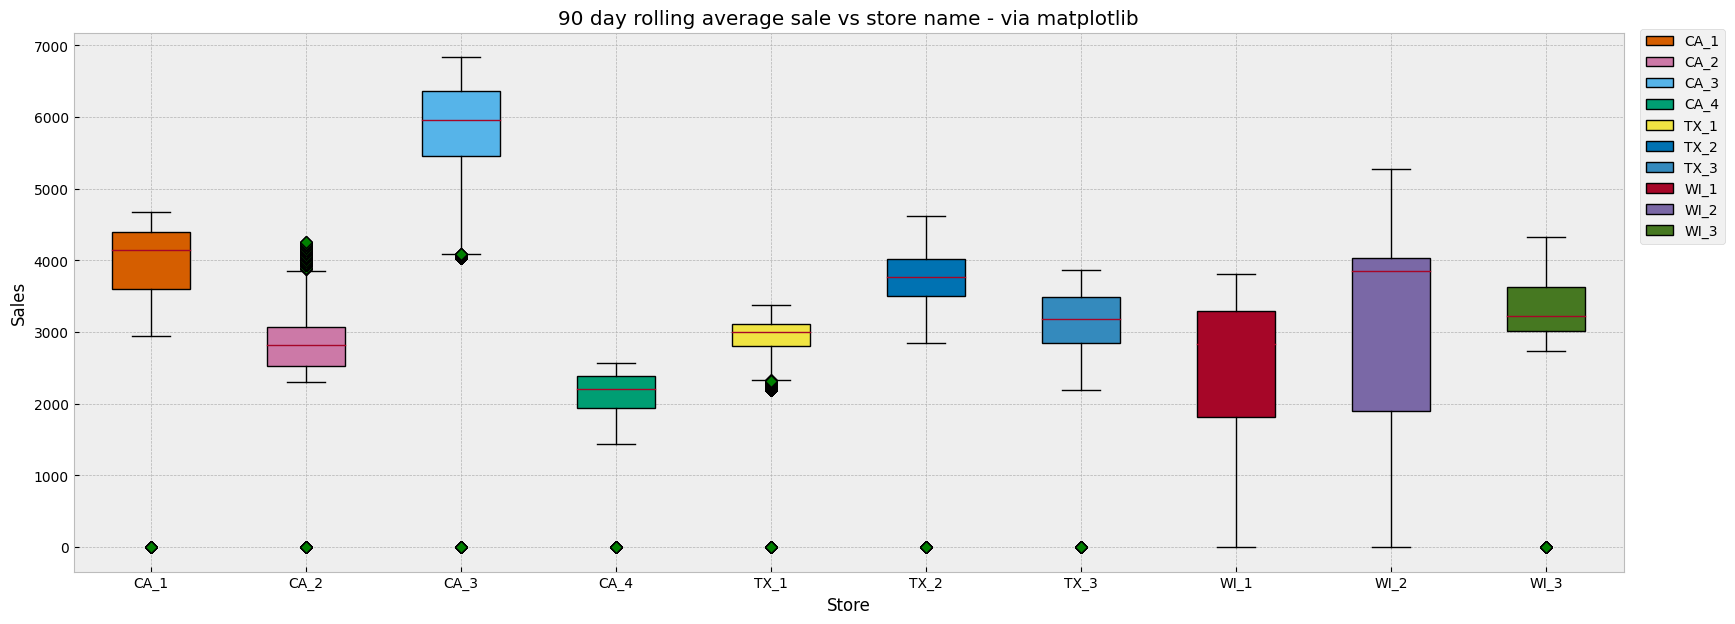

In [ ]:
all_data = []

for s in store_list:
    store_items = [c for c in past_sales_item.columns if s in c]
    data = past_sales_item[store_items].sum(axis=1).rolling(90).mean()
    all_data.append(np.nan_to_num(np.array(data)))


plt.figure(figsize=(20,7))
green_diamond = dict(markerfacecolor='g', marker='D')
bplot = plt.boxplot(all_data, labels=store_list, flierprops=green_diamond, patch_artist=True, manage_ticks=True)

# fill boxplots with colors
colors = [next(color_cycle) for i in range(0,len(store_list))]
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

plt.xlabel('Store')
plt.ylabel('Sales')
plt.title('90 day rolling average sale vs store name - via matplotlib')
plt.legend(bplot['boxes'],store_list, bbox_to_anchor=(1.07,1.02))
plt.show()

Rolling 90 day whisker plot for average sales and store - by plotly

In [ ]:
import plotly.graph_objects as go
fig=go.Figure()
for i, s in enumerate(store_list):
    store_items = [c for c in past_sales_item.columns if s in c]
    data = past_sales_item[store_items].sum(axis=1).rolling(90).mean()
    fig.add_trace(go.Box(x=[s]*len(data), y=data, name=s))
fig.update_layout(yaxis_title="Sales", xaxis_title="Stores", title="90 day rolling average sale vs store name - via plotly")


Mean sales of store

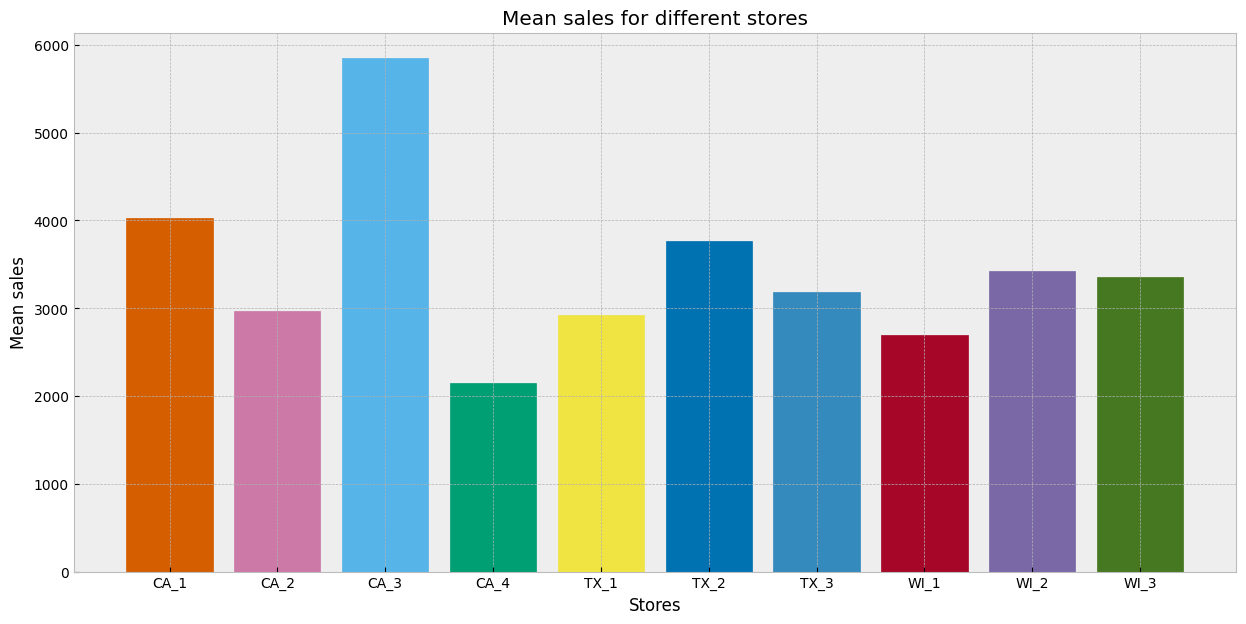

In [ ]:
mean_value_store = []
for s in store_list:
    store_items = [c for c in past_sales_item if s in c]
    mean_value_store.append(np.mean(past_sales_item[store_items].sum(axis=1)))

plt.figure(figsize=(15,7))
bplot = plt.bar(store_list,mean_value_store)

#fill different colors for bar plot
colors = [next(color_cycle) for i in range(0,len(store_list))]
for i, b in enumerate(bplot):
    b.set_color(colors[i])

plt.xlabel('Stores')
plt.ylabel('Mean sales')
plt.title('Mean sales for different stores')
plt.show()

# Rolling 7 day demand count by store

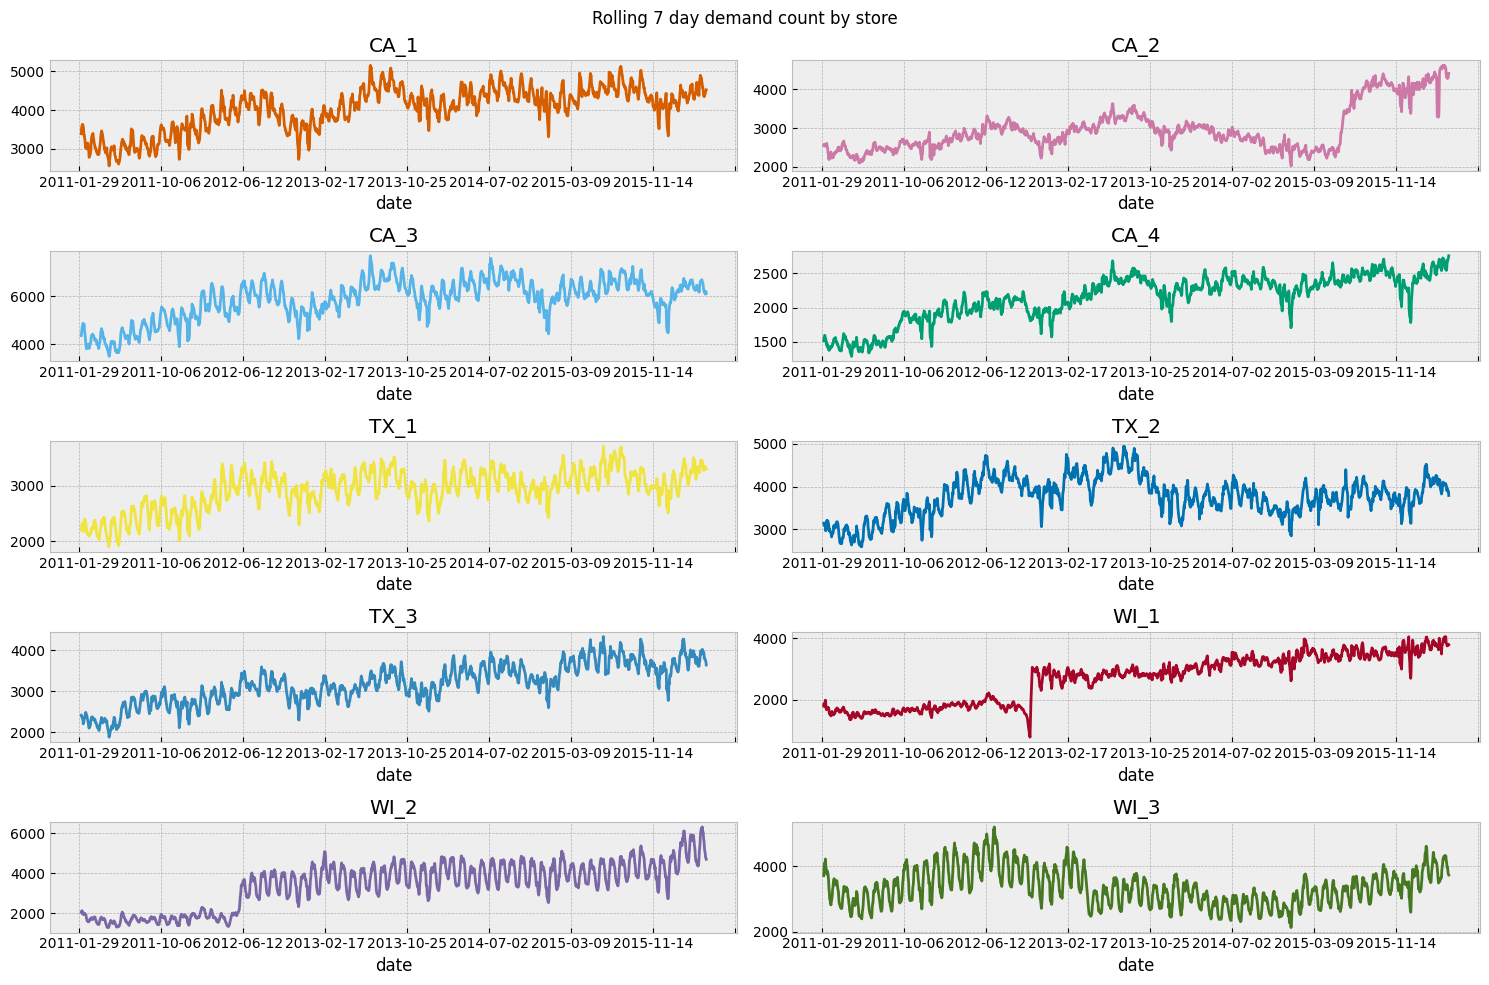

In [ ]:
fig, axs = plt.subplots(5,2,figsize=(15,10))
axs=axs.flatten()
ax_id=0

for i in sellp_data['store_id'].unique():
    store_items = [c for c in past_sales_item.columns if i in c]
    past_sales_item[store_items].sum(axis=1) \
    .rolling(7).mean() \
    .plot(title=i, color=next(color_cycle), ax=axs[ax_id])

    ax_id+=1

plt.suptitle('Rolling 7 day demand count by store')
plt.tight_layout()
plt.show()


In [ ]:
salestv_data.groupby('store_id').sum().T \
.merge(cal_data.set_index('d'), left_index=True, right_index=True).set_index('date').groupby('wday').mean()[sellp_data['store_id'].unique()]

#fig, axs = plt.subplots(5,2,figsize=(20,20))
#axs=axs.flatten()

#for i in data.columns:
#    data[i].plot(color=next(color_cycle))

TypeError: Could not convert SaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturdaySaturday to numeric